<a href="https://colab.research.google.com/github/manarifz/Data-Science-Bootcamp/blob/main/Project_CarPrice_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Car Price Value Using Linear Regression Model

#### In this project, building a model to predict the unknown value is required. Thinking like a data scientist, the follow the data science methodology as shown below:

#### 1. Business Understanding

- Our problem here is finding the value of the Car Price.
- Main Goal: Predict the value of Car Price based on single independent variable.
- Main Object: Building a predictive model.

#### 2. Analytic Approach
- In this project the problem is about predicting the Car Price.
- By using Simple Linear Regression algorithm to solve the problem.

#### 3. Data Requirements
- Necessary data content, Data Formats, Sources for initial data collection.

- In thin project we need to collect data about the Car Price and all other features related to car.

#### 4. Data Collection
- After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

#### 5. Data Understanding
- Data understanding encompasses all activities related to constructing the data set.

### Import necessary libraries for analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('teleCust1000t.csv')

df.head(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [ ]:
name_col = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

name_col

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

### Adding name of each features into the respective columns

In [ ]:
#assigning name for each features into the respective columns
df.columns = name_col
#read the first ten rows of the dataset
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [ ]:
#checking number of rows and columns of dataset
df.shape

(204, 26)

In [ ]:
#display all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#read first five rows of the dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
#checking information background of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [ ]:
#checking any missing data from dataset
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

6. Data Preparation

#### Data Wrangling

In [ ]:
#stastistical summary of dataset (numerical value ontly)
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
#full statistical summary of dataset (categorical and numerical)
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204,204,204,204,204,204,204,204,204.000000,204.000000,204.000000,204.000000,204.000000,204,204,204.000000,204,204,204,204.000000,204,204,204.000000,204.000000,204
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,186
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,40,32,184,167,114,96,120,201,NaN,NaN,NaN,NaN,NaN,148,158,NaN,93,23,20,NaN,19,37,NaN,NaN,4
mean,0.823529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.806373,174.075000,65.916667,53.749020,2555.602941,NaN,NaN,126.892157,NaN,NaN,NaN,10.148137,NaN,NaN,25.240196,30.769608,NaN
std,1.239035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.994144,12.362123,2.146716,2.424901,521.960820,NaN,NaN,41.744569,NaN,NaN,NaN,3.981000,NaN,NaN,6.551513,6.898337,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.075000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.575000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,119.500000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.200000,66.900000,55.500000,2939.250000,NaN,NaN,142.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.500000,NaN


In [ ]:
#replacing '?' with unknown value in the dataset
df.replace('?', np.nan, inplace=True)

df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
16,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
110,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580
170,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2714,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11549
18,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295
186,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
71,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
107,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.70,3.52,21.0,95,4150,28,33,13200
183,2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,ohc,four,97,idi,3.01,3.40,23.0,52,4800,37,46,7995


In [ ]:
#checking information background again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [ ]:
#checking missing data
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
#calculating the mean value and change into float data type
mean_normalized = df['normalized-losses'].astype('float').mean()

mean_normalized

122.0

In [ ]:
#replacing unknown value with mean value for normalized-losses features
df['normalized-losses'].replace(np.nan, mean_normalized, inplace=True)

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
#checking frequency on num-of-doors features
df['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

In [ ]:
#replacing unknown value with most frequent data in num-of-doors
df['num-of-doors'].replace(np.nan,'four', inplace=True)

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
#calculating the mean value for bore, stroke, horsepower and peak-rpm and change datatype into float
mean_bore = df['bore'].astype('float').mean()
mean_stroke = df['stroke'].astype('float').mean()
mean_horse = df['horsepower'].astype('float').mean()
mean_peak = df['peak-rpm'].astype('float').mean()

print (mean_bore)
print (mean_stroke)
print (mean_horse)
print (mean_peak)

3.3290500000000014
3.258299999999994
104.22277227722772
5125.990099009901


In [ ]:
#replacing unknown value with mean value for each selected features
df['bore'].replace(np.nan, mean_bore, inplace=True)
df['stroke'].replace(np.nan, mean_stroke, inplace=True)
df['horsepower'].replace(np.nan, mean_horse, inplace=True)
df['peak-rpm'].replace(np.nan, mean_horse, inplace=True)

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
#remove the unknown value from the dataset
df.dropna(subset=['price'], axis=0, inplace= True)

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77     False
78     False
79     False

In [ ]:
#check the duplicated columns from dataset

check_duplicate = df[df.duplicated()]

check_duplicate.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [ ]:
#remove the duplicated rows from dataset

df = df.drop_duplicates()

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925


In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
df.shape

(200, 26)

- Data Formatting

In [ ]:
#convert data types from 'object' to 'float' / 'int'

df['normalized-losses'] = df['normalized-losses'].astype('float')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df[['peak-rpm', 'price']] = df[['peak-rpm', 'price']].astype('float')

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [ ]:
#mydata['city-mpg'] = 235/mydata['city-mpg'] #convert and update the same column

df['city-L/100km'] = 235/df['city-mpg']

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421


In [ ]:
df['highway-L/100km'] = 235/df['highway-mpg']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,9.400000


In [ ]:
#remove/drop the specific column from the dataset

df.drop('city-mpg', axis=1, inplace=True)
df.drop('highway-mpg', axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,15250.0,12.368421,9.400000


- Data Normalisation

In [ ]:
#display specific columns features from dataset - width, length and height
df[['width','length','height']].head(30)

,width,length,height
0,64.1,168.8,48.8
1,65.5,171.2,52.4
2,66.2,176.6,54.3
3,66.4,176.6,54.3
4,66.3,177.3,53.1
5,71.4,192.7,55.7
6,71.4,192.7,55.7
7,71.4,192.7,55.9
9,64.8,176.8,54.3
10,64.8,176.8,54.3


In [ ]:
df[['width','length','height']].describe()

,width,length,height
count,200.000000,200.000000,200.000000
mean,65.898000,174.228000,53.791500
std,2.102904,12.347132,2.428449
min,60.300000,141.100000,47.800000
25%,64.175000,166.675000,52.000000
50%,65.500000,173.200000,54.100000
75%,66.675000,183.500000,55.525000
max,72.000000,208.100000,59.800000


In [ ]:
#simple feature scaling

df['width'] = df['width']/df['width'].max()
df['length'] = df['length']/df['length'].max()
df['height'] = df['height']/df['height'].max()

df[['width','length','height']].head(30)

,width,length,height
0,0.890278,0.811148,0.816054
1,0.909722,0.822681,0.876254
2,0.919444,0.848630,0.908027
3,0.922222,0.848630,0.908027
4,0.920833,0.851994,0.887960
5,0.991667,0.925997,0.931438
6,0.991667,0.925997,0.931438
7,0.991667,0.925997,0.934783
9,0.900000,0.849592,0.908027
10,0.900000,0.849592,0.908027


In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,3.259816,10.170100,103.367228,5068.042228,13205.690000,9.937914,8.041663
std,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314177,4.014163,37.455570,692.680034,7966.982558,2.539415,1.844764
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,104.222772,5118.000000,4.795918,4.351852
25%,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5150.000000,10270.000000,9.791667,7.833333
75%,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,16500.750000,12.368421,9.400000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,45400.000000,18.076923,14.687500


**Convert Categorical to Numerical Values**

In [ ]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
price                float64
city-L/100km         float64
highway-L/100km      float64
dtype: object

In [ ]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
count,200.000000,200.000000,200,200,200,200,200,200,200,200.000000,200.000000,200.000000,200.000000,200.000000,200,200,200.000000,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,180,164,115,94,118,197,NaN,NaN,NaN,NaN,NaN,145,156,NaN,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.830000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.848000,0.837232,0.915250,0.899523,2555.705000,NaN,NaN,126.860000,NaN,3.329981,3.259816,10.170100,103.367228,5068.042228,13205.690000,9.937914,8.041663
std,1.248557,32.076542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038261,0.059333,0.029207,0.040610,518.594552,NaN,NaN,41.650501,NaN,0.268562,0.314177,4.014163,37.455570,692.680034,7966.982558,2.539415,1.844764
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,0.799331,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,104.222772,5118.000000,4.795918,4.351852
25%,0.000000,100.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.800937,0.891319,0.869565,2163.000000,NaN,NaN,97.750000,NaN,3.150000,3.117500,8.575000,70.000000,4800.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,0.904682,2414.000000,NaN,NaN,119.500000,NaN,3.310000,3.290000,9.000000,95.000000,5150.000000,10270.000000,9.791667,7.833333
75%,2.000000,138.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.926042,0.928512,2928.250000,NaN,NaN,142.000000,NaN,3.582500,3.410000,9.400000,116.000000,5500.000000,16500.750000,12.368421,9.400000


In [ ]:
df['fuel-type'].value_counts()

gas       180
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
#one hot encoding method

convert_fuel = pd.get_dummies(df['fuel-type'], dtype=int)

#convert_fuel = pd.get_dummies(mydata['fuel-type'], dtype=int)

convert_fuel.head(20)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
9,0,1
10,0,1


In [ ]:
#concatenating new columns into dataset
df1 = pd.concat([df, convert_fuel], axis=1)

df1.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,diesel,gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,16500.0,11.190476,8.703704,0,1
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,16500.0,12.368421,9.038462,0,1
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,13950.0,9.791667,7.833333,0,1
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,17450.0,13.055556,10.681818,0,1
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,15250.0,12.368421,9.400000,0,1
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,17710.0,12.368421,9.400000,0,1
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,18920.0,12.368421,9.400000,0,1
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,23875.0,13.823529,11.750000,0,1
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16430.0,10.217391,8.103448,0,1
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16925.0,10.217391,8.103448,0,1


In [ ]:
#rename new columns in dataset
df1.rename(columns={'diesel':'fuel_diesel', 'gas':'fuel_gas'}, inplace=True)

df1.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,16500.0,11.190476,8.703704,0,1
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,16500.0,12.368421,9.038462,0,1
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,13950.0,9.791667,7.833333,0,1
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,17450.0,13.055556,10.681818,0,1
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,15250.0,12.368421,9.400000,0,1
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,17710.0,12.368421,9.400000,0,1
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,18920.0,12.368421,9.400000,0,1
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,23875.0,13.823529,11.750000,0,1
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16430.0,10.217391,8.103448,0,1
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16925.0,10.217391,8.103448,0,1


In [ ]:
#one hot encoding method

convert_aspiration = pd.get_dummies(df['aspiration'], dtype=int)

convert_aspiration.head(20)

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
9,1,0
10,1,0


In [ ]:
#concatenating new columns into dataset
df2 = pd.concat([df1, convert_aspiration], axis=1)

df2.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,std,turbo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,13950.0,9.791667,7.833333,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,17450.0,13.055556,10.681818,0,1,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,15250.0,12.368421,9.400000,0,1,1,0
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,17710.0,12.368421,9.400000,0,1,1,0
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,18920.0,12.368421,9.400000,0,1,1,0
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,23875.0,13.823529,11.750000,0,1,0,1
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16430.0,10.217391,8.103448,0,1,1,0
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16925.0,10.217391,8.103448,0,1,1,0


In [ ]:
#renaming new columns in the datset
df2.rename(columns={'std':'aspiration_std', 'turbo':'aspiration_turbo'}, inplace=True)

df2.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,13950.0,9.791667,7.833333,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,17450.0,13.055556,10.681818,0,1,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,15250.0,12.368421,9.400000,0,1,1,0
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,17710.0,12.368421,9.400000,0,1,1,0
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,18920.0,12.368421,9.400000,0,1,1,0
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,23875.0,13.823529,11.750000,0,1,0,1
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16430.0,10.217391,8.103448,0,1,1,0
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16925.0,10.217391,8.103448,0,1,1,0


In [ ]:
df2.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo
count,200.000000,200.000000,200,200,200,200,200,200,200,200.000000,200.000000,200.000000,200.000000,200.000000,200,200,200.000000,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,180,164,115,94,118,197,NaN,NaN,NaN,NaN,NaN,145,156,NaN,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.830000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.848000,0.837232,0.915250,0.899523,2555.705000,NaN,NaN,126.860000,NaN,3.329981,3.259816,10.170100,103.367228,5068.042228,13205.690000,9.937914,8.041663,0.100000,0.900000,0.820000,0.180000
std,1.248557,32.076542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038261,0.059333,0.029207,0.040610,518.594552,NaN,NaN,41.650501,NaN,0.268562,0.314177,4.014163,37.455570,692.680034,7966.982558,2.539415,1.844764,0.300753,0.300753,0.385152,0.385152
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,0.799331,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,104.222772,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.800937,0.891319,0.869565,2163.000000,NaN,NaN,97.750000,NaN,3.150000,3.117500,8.575000,70.000000,4800.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,0.904682,2414.000000,NaN,NaN,119.500000,NaN,3.310000,3.290000,9.000000,95.000000,5150.000000,10270.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,138.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.926042,0.928512,2928.250000,NaN,NaN,142.000000,NaN,3.582500,3.410000,9.400000,116.000000,5500.000000,16500.750000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000


In [ ]:
df2['num-of-doors'].value_counts()

four    115
two      85
Name: num-of-doors, dtype: int64

In [ ]:
convert_num_of_doors = pd.get_dummies(df['num-of-doors'], dtype=int)

convert_num_of_doors.head(20)

,four,two
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
9,0,1
10,1,0


In [ ]:
#concatenate new columns into dataset
df3 = pd.concat([df2, convert_num_of_doors], axis=1)

df3.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,four,two
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0,0,1
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0,0,1
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,13950.0,9.791667,7.833333,0,1,1,0,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,17450.0,13.055556,10.681818,0,1,1,0,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,15250.0,12.368421,9.400000,0,1,1,0,0,1
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,17710.0,12.368421,9.400000,0,1,1,0,1,0
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,18920.0,12.368421,9.400000,0,1,1,0,1,0
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,23875.0,13.823529,11.750000,0,1,0,1,1,0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16430.0,10.217391,8.103448,0,1,1,0,0,1
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16925.0,10.217391,8.103448,0,1,1,0,1,0


In [ ]:
#renaming new columns in datsaet
df3.rename(columns={'four':'four-doors', 'two':'two-doors'}, inplace=True)

df3.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,four-doors,two-doors
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0,0,1
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0,0,1
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,13950.0,9.791667,7.833333,0,1,1,0,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,17450.0,13.055556,10.681818,0,1,1,0,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,15250.0,12.368421,9.400000,0,1,1,0,0,1
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,17710.0,12.368421,9.400000,0,1,1,0,1,0
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,18920.0,12.368421,9.400000,0,1,1,0,1,0
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,23875.0,13.823529,11.750000,0,1,0,1,1,0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16430.0,10.217391,8.103448,0,1,1,0,0,1
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,16925.0,10.217391,8.103448,0,1,1,0,1,0


In [ ]:
df3.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,four-doors,two-doors
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0,0,1
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0,0,1
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333,0,1,1,0,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818,0,1,1,0,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,15250.0,12.368421,9.400000,0,1,1,0,0,1
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,17710.0,12.368421,9.400000,0,1,1,0,1,0
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,18920.0,12.368421,9.400000,0,1,1,0,1,0
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,23875.0,13.823529,11.750000,0,1,0,1,1,0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,16430.0,10.217391,8.103448,0,1,1,0,0,1
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,16925.0,10.217391,8.103448,0,1,1,0,1,0


**Data Binning**

In [ ]:
bins_price = np.linspace(df3['price'].min(),df3['price'].max(), 4)

print(bins_price)

label_names = ['Low Price', 'Average Price', 'High Price']

df3['Price_Binning'] = pd.cut(df3['price'], bins_price, labels=label_names, include_lowest=True)

df3[['price', 'Price_Binning']].head (30)

[ 5118.         18545.33333333 31972.66666667 45400.        ]


,price,Price_Binning
0,16500.0,Low Price
1,16500.0,Low Price
2,13950.0,Low Price
3,17450.0,Low Price
4,15250.0,Low Price
5,17710.0,Low Price
6,18920.0,Average Price
7,23875.0,Average Price
9,16430.0,Low Price
10,16925.0,Low Price


In [ ]:
df3.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,four-doors,two-doors,Price_Binning
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0,0,1,Low Price
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0,0,1,Low Price
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333,0,1,1,0,1,0,Low Price
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818,0,1,1,0,1,0,Low Price
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,15250.0,12.368421,9.400000,0,1,1,0,0,1,Low Price
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,17710.0,12.368421,9.400000,0,1,1,0,1,0,Low Price
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,18920.0,12.368421,9.400000,0,1,1,0,1,0,Average Price
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,23875.0,13.823529,11.750000,0,1,0,1,1,0,Average Price
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,16430.0,10.217391,8.103448,0,1,1,0,0,1,Low Price
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,16925.0,10.217391,8.103448,0,1,1,0,1,0,Low Price


**Exploratory Data Analysis**

**Visualising Data Using Scatter Plot**

In [ ]:
#finding the correlation features
df3.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo,four-doors,two-doors
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,-0.181073,0.074625,0.186592,-0.083327,0.062423,-0.033159,-0.195381,0.195381,0.050995,-0.050995,-0.669595,0.669595
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,-0.114738,0.217322,0.165757,0.133999,0.238712,0.181247,-0.101574,0.101574,0.006915,-0.006915,-0.362582,0.362582
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,0.249689,0.375582,-0.219402,0.589147,0.484047,0.584953,0.306706,-0.306706,-0.254907,0.254907,0.440101,-0.440101
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,0.159203,0.580606,-0.227395,0.691044,0.659174,0.708466,0.210616,-0.210616,-0.229294,0.229294,0.394091,-0.394091
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,0.189008,0.617132,-0.193715,0.752795,0.677111,0.739845,0.243448,-0.243448,-0.304459,0.304459,0.223877,-0.223877
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,0.259526,-0.085852,-0.190256,0.137284,0.008923,0.088903,0.281198,-0.281198,-0.086531,0.086531,0.533943,-0.533943
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,0.156444,0.758071,-0.188236,0.834420,0.785868,0.837217,0.221082,-0.221082,-0.322097,0.322097,0.209132,-0.209132
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,0.029005,0.822695,-0.186580,0.872337,0.745337,0.783593,0.070925,-0.070925,-0.110278,0.110278,0.024613,-0.024613
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,0.002034,0.566835,-0.220045,0.543433,0.553954,0.558675,0.055395,-0.055395,-0.229338,0.229338,0.122789,-0.122789
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,0.186780,0.101003,-0.194145,0.083298,0.041310,0.051032,0.240046,-0.240046,-0.215805,0.215805,-0.018682,0.018682


<AxesSubplot:>

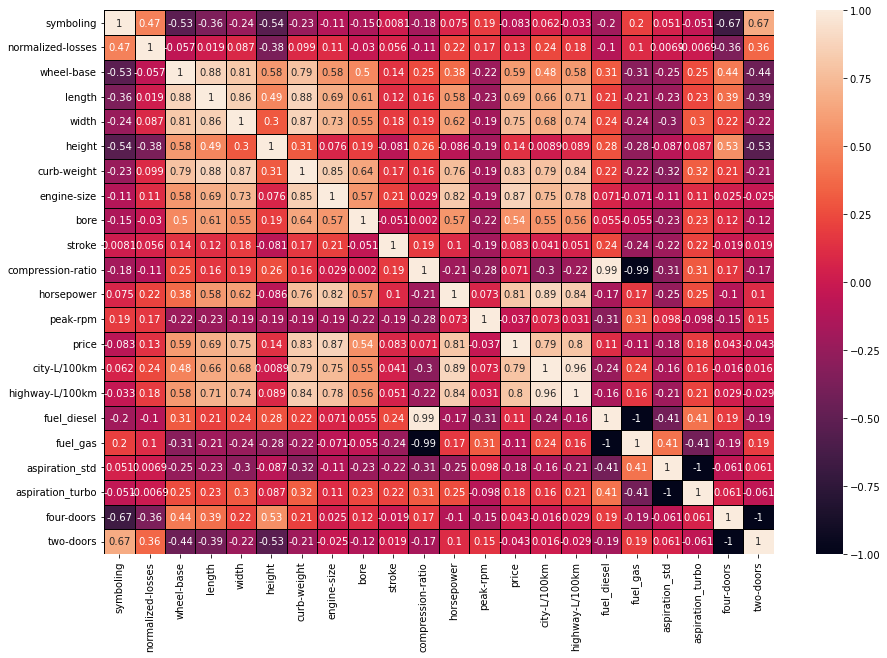

In [ ]:
plt.figure(figsize=(15, 10))

df3_corr = df3.corr()

sns.heatmap(df3_corr, linewidths=1, linecolor='Black', annot=True)

Text(0, 0.5, 'Price')

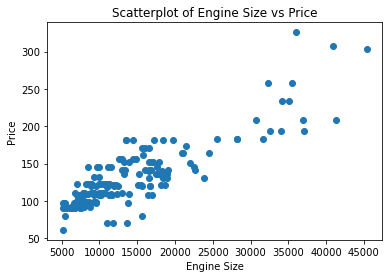

In [ ]:
x = df3['price']
y = df3['engine-size']
plt.scatter(x,y)

plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

(0.0, 53646.07536874115)

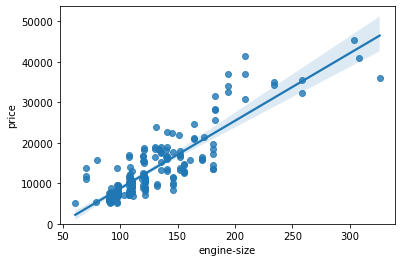

In [ ]:
#Linear Regression Plot
sns.regplot(x='engine-size', y='price', data=df3)
plt.ylim(0,)

In [ ]:
#finding pearson coefficient value and p value of the correlated features
import scipy.stats as st

correlation, p_value = st.pearsonr(df3['engine-size'], df3['price'])

print ('Pearson Coeff is:', correlation, 'and The P Value is:', p_value)

Pearson Coeff is: 0.8723367498521142 and The P Value is: 1.8977171466563487e-63


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

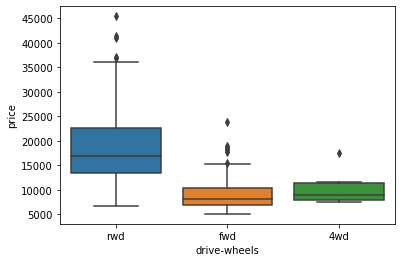

In [ ]:
#box plot
#between categorical column and numerical column

sns.boxplot(x='drive-wheels', y='price', data=df3)

<AxesSubplot:xlabel='body-style', ylabel='price'>

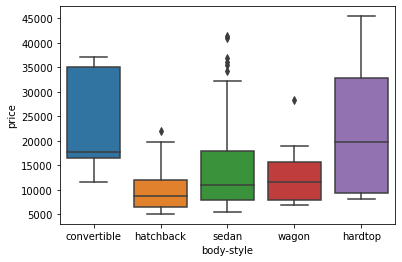

In [ ]:
sns.boxplot(x='body-style', y='price', data=df3)

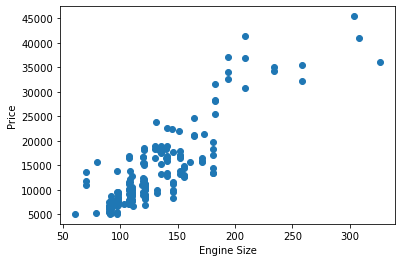

In [ ]:
#visualise correlated feature to price
plt.scatter(df3['engine-size'], df3['price'])
plt.xlabel('Engine Size') #label the x-axis
plt.ylabel('Price') #label the y-axis
plt.show()

In [ ]:
msk = np.random.rand(len(df3)) < 0.8 #choose 80% of the data (79.99999%)

#msk_test = np.random.rand(len(df)) < 0.2

train = df3[msk]
test = df3[~msk] #the rest of 20% will do the testing

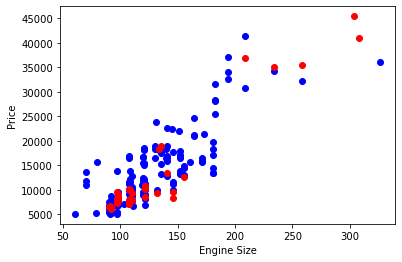

In [ ]:
#visualise correlated feature to price
plt.scatter(train[['engine-size']], train[['price']], color='blue')
plt.scatter(test[['engine-size']], test[['price']], color='red')
plt.xlabel('Engine Size') #label the x-axis
plt.ylabel('Price') #label the y-axis
plt.show()

**7. Modelling**

In [ ]:
#importing the linear model from scikit learn to use simple linear regression

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['engine-size']])
train_y = np.asanyarray(train[['price']])

regr.fit(train_x, train_y)

#checking the theta zero and theta one of simple linear regression

print ('Theta Zero is:', regr.intercept_)
print ('Theta One is:', regr.coef_)

Theta Zero is: [-6984.22772993]
Theta One is: [[160.85079825]]


In [ ]:
x = 350

yhat = regr.intercept_ + regr.coef_ * x

yhat

array([[49313.55165681]])

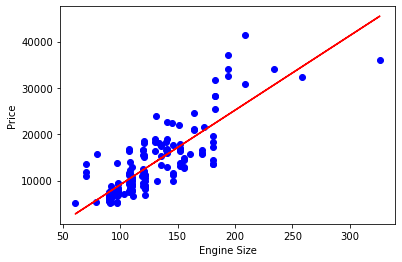

In [ ]:
#visualise the best fitter line of linear regression on the training set
plt.scatter(train['engine-size'], train['price'], color='blue')
plt.plot(train_x,  regr.intercept_[0] + regr.coef_[0][0] *train_x, 'red')
plt.xlabel('Engine Size') #label the x-axis
plt.ylabel('Price') #label the y-axis
plt.show()

#### **8. Evaluation**

In [ ]:
#import r2 score from sklearn
from sklearn.metrics import r2_score
#define text_x and test_y
test_x = np.asanyarray(test[['engine-size']])
test_y = np.asanyarray(test[['price']])
#define test_y_ for prediction
test_y_= regr.predict(test_x)

#display mean absolute errors, mean squared error and accuracy of the model (R Square)
print ('The Mean Absolute Errors is:', np.mean(np.absolute(test_y_ - test_y)))

print ('The Mean Squared Error is:', np.mean((test_y_ - test_y)**2))

print ('The Accuracy of The Model (R Squared) is:', (r2_score(test_y, test_y_))*100)

The Mean Absolute Errors is: 2558.338563805049
The Mean Squared Error is: 11341793.59787915
The Accuracy of The Model (R Squared) is: 89.34387769151373


#### **9. Conclusion**
-  It was concluded that the car price is highly influenced by the engine size feature. The bigger the size the car engine, the higher price of a car.